# IFT6390 - Project 

https://colab.research.google.com/drive/1YtKwalIq2NYe9lec2GYPDC5jjJLv1EM-

Group Members:
- Luo Ru Lan
- Mathieu Peloquin
- Ahmed Gueddiche

In [ ]:
# !pip install git+https://github.com/samsinai/FLEXS

# # It allows the following import:
# import flexs
# from flexs import baselines
# import flexs.utils.sequence_utils as s_utils
!pip install transformers
!pip install datasets
!pip install tokenizers

import torch
import torch.nn as nn
import numpy as np
import pandas as pd



import re
def set_global_logging_level(level=logging.ERROR, prefices=[""]):
    """
    Override logging levels of different modules based on their name as a prefix.
    It needs to be invoked after the modules have been loaded so that their loggers have been initialized.

    Args:
        - level: desired level. e.g. logging.INFO. Optional. Default is logging.ERROR
        - prefices: list of one or more str prefices to match (e.g. ["transformers", "torch"]). Optional.
          Default is `[""]` to match all active loggers.
          The match is a case-sensitive `module_name.startswith(prefix)`
    """
    prefix_re = re.compile(fr'^(?:{ "|".join(prefices) })')
    for name in logging.root.manager.loggerDict:
        if re.match(prefix_re, name):
            logging.getLogger(name).setLevel(level)

import logging
set_global_logging_level(logging.ERROR)
import transformers
import logging
set_global_logging_level(logging.ERROR, ["transformers"])
import logging
logging.disable(logging.INFO)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 46.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 27.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 109.5 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 26.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 24.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 68.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 31.6 MB/s eta 0:00:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
training_data_pth = "https://raw.githubusercontent.com/SimonDufLab/IFT6390--H2023--Project/main/training_data.csv"
test_data_pth = "https://raw.githubusercontent.com/SimonDufLab/IFT6390--H2023--Project/main/test_data.csv"

In [ ]:
import pandas

training_data = pandas.read_csv(training_data_pth, usecols=[1,2,3])
test_data = pandas.read_csv(test_data_pth, usecols=[1,2,3])

print(f"Training dataset contains {len(training_data)} examples")
print(f"Test dataset contains {len(test_data)} examples")
training_data.head(10)

Training dataset contains 299307 examples
Test dataset contains 58339 examples


,starting_seq,binding,fitness
0,GCTCGAGC,GCAAAGGC,0.328104
1,GCTCGAGC,AGGTAATA,0.732033
2,GCTCGAGC,TCACTATA,0.739599
3,GCTCGAGC,GGTCAAGG,0.273719
4,GCTCGAGC,AAAAGACG,0.466293
5,GCTCGAGC,CCGCGTTA,0.311858
6,GCTCGAGC,AGCTACCG,0.238455
7,GCTCGAGC,GGTCCATA,0.391704
8,GCTCGAGC,ACCGGAGA,0.562085
9,GCTCGAGC,TATCGGGG,0.868779


In [ ]:
training_data[training_data.starting_seq == 'GCTCGAGC']

,starting_seq,binding,fitness
0,GCTCGAGC,GCAAAGGC,0.328104
1,GCTCGAGC,AGGTAATA,0.732033
2,GCTCGAGC,TCACTATA,0.739599
3,GCTCGAGC,GGTCAAGG,0.273719
4,GCTCGAGC,AAAAGACG,0.466293
...,...,...,...
21425,GCTCGAGC,TGCAGCGG,0.237940
21426,GCTCGAGC,GCGCCGGT,0.312869
21427,GCTCGAGC,CGAAGCCA,0.262370
21428,GCTCGAGC,AAGTTGTC,0.445326


In [ ]:
training_data[training_data.binding == 'GCAAAGGC']

,starting_seq,binding,fitness
0,GCTCGAGC,GCAAAGGC,0.328104
21430,GCGCGCGC,GCAAAGGC,0.328104
64368,ATATAGCC,GCAAAGGC,0.328104
85792,GTTTGGTA,GCAAAGGC,0.328104
107113,ATTATGTT,GCAAAGGC,0.328104
149784,AAAAATTT,GCAAAGGC,0.328104
171139,AAAAACGC,GCAAAGGC,0.328104
278021,AAAGAGAG,GCAAAGGC,0.328104


In [ ]:
training_data.binding.value_counts()

AATGGATA    12
ATAAACTT    12
ATATTTTG    11
ACACTGTT    11
TATCTTAT    11
            ..
GACGCCGG     1
GGGTCAGA     1
CTAACGCA     1
TGGCGCCA     1
CGATTCAT     1
Name: binding, Length: 65283, dtype: int64

## Q1:

Train your ensemble on the data we provide to learn a surrogate model $\tilde{\varphi}$ that approximates the quality of the generated sequences. Use an appropriate statistical learning methodology in training, hyperparameter selection, and result evaluation. Provide a figure showing the training and test performance as a function of the optimization step.

We use **Deep ensembles using random prior functions:**

### Prepare data:

### 1. Create dataset:

In [ ]:
class DNADataset(torch.utils.data.Dataset):
  
  def __init__(self, data):
    self.starting_sequences = data['starting_seq'].values
    self.binding = data['binding'].values
    self.fitness = data['fitness'].values
    self.char2indx = {}
    vocab = ['A', 'T', 'C', 'G']
    for i, char in enumerate(vocab):
      self.char2indx[char] = i

  def encode_sequence(self, sequence):
    encoded_seq = [self.char2indx[char] for char in sequence]
    return torch.tensor(encoded_seq, dtype=torch.long)

  def __len__(self):
    return len(self.starting_sequences)

  def __getitem__(self, indx):
    seq = self.starting_sequences[indx]
    bind = self.binding[indx]
    encoded_seq = self.encode_sequence(seq)
    encoded_bind = self.encode_sequence(bind)
    return (torch.cat([encoded_seq, encoded_bind]).unsqueeze(1), torch.tensor(self.fitness[indx], dtype=torch.float))

### 2. Create model:

Deep ensembles with random priors:


In [ ]:
class BaselineModel(nn.Module):
  def __init__(self, vocab_size=4, emb_dim=16, seq_len=16):
    super(BaselineModel, self).__init__()
    self.seq_len = seq_len
    self.emb = nn.Embedding(num_embeddings=vocab_size, embedding_dim=emb_dim)
    self.lstm = nn.LSTM(input_size=emb_dim, hidden_size=emb_dim, num_layers=2, batch_first=True)
    self.fc1 = nn.Linear(in_features=emb_dim * self.seq_len, out_features=1)
    self.init_weights()

  def forward(self, x):
    bs, seq_len = x.shape[0], x.shape[1]
    embeds = self.emb(x)
    lstm_out, _ = self.lstm(embeds.view(bs, seq_len, -1))
    out = torch.sigmoid(self.fc1(lstm_out.reshape(bs, -1))) #sigmoid as fitness is in [0, 1]
    return out


  def init_weights(self):
    torch.nn.init.xavier_uniform_(self.emb.weight)
    #torch.nn.init.xavier_uniform_(self.lstm.weight)
    torch.nn.init.xavier_uniform_(self.fc1.weight)

In [ ]:
def loss_fn(y_pred, y_true, trainable_params, prior_params, sigma=0.02, lamda=0.01):
  loss = nn.MSELoss()(y_pred, y_true)
  reg = sigma**2 / lamda 
  L2 = 0.0
  for i in range(len(prior_params)):
    L2 = torch.linalg.vector_norm(trainable_params[i] - prior_params[i])**2
  loss += reg * L2
  return loss

### 3. Training

In [ ]:
from tqdm import tqdm
import json
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
def train_epoch(trainable, prior, train_loader, optimizer):
  train_loss = 0.0
  train_mse = 0.0
  for input, output in train_loader:
    trainable.zero_grad()
    input, output = input.to(device), output.to(device)
    preds = trainable(input).squeeze()
    loss = loss_fn(preds, output, list(trainable.parameters()), list(prior.parameters()))
    loss.backward()
    optimizer.step()
    train_loss += loss.item()
    train_mse = nn.MSELoss()(preds, output)
  train_loss /= len(train_loader)
  return trainable, train_loss, train_mse

def validation(trainable, prior, val_loader):
  #run validation
  val_loss = 0.0
  val_mse = 0.0
  with torch.no_grad():
    for input, output in val_loader:
      input, output = input.to(device), output.to(device)
      preds = trainable(input).squeeze()
      loss = loss_fn(preds, output, list(trainable.parameters()), list(prior.parameters()))
      val_loss += loss.item()
      val_mse = nn.MSELoss()(preds, output)
    val_loss /= len(val_loader)
  return val_loss, val_mse

In [ ]:
"""
  EarlyStopping code taken from https://github.com/Bjarten/early-stopping-pytorch with some modifications
"""
class EarlyStopping:
    """Early stops the training if validation loss doesn't improve after a given patience."""
    def __init__(self, patience=7, verbose=False, delta=0, path='checkpoint.pt', trace_func=print):
        """
        Args:
            patience (int): How long to wait after last time validation loss improved.
                            Default: 7
            verbose (bool): If True, prints a message for each validation loss improvement. 
                            Default: False
            delta (float): Minimum change in the monitored quantity to qualify as an improvement.
                            Default: 0
            path (str): Path for the checkpoint to be saved to.
                            Default: 'checkpoint.pt'
            trace_func (function): trace print function.
                            Default: print            
        """
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = np.Inf
        self.delta = delta
        self.path = path
        self.trace_func = trace_func
    def __call__(self, val_loss, model):

        score = -val_loss

        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
        elif score < self.best_score + self.delta:
            self.counter += 1
            self.trace_func(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        '''Saves model when validation loss decrease.'''
        if self.verbose:
            self.trace_func(f'Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}).  Saving model ...')
        torch.save(model.state_dict(), self.path)
        self.val_loss_min = val_loss

In [ ]:
#define dataset
train = training_data.sample(frac=0.75)
val = training_data.loc[~training_data.index.isin(train.index)]

train_dataset = DNADataset(train)
val_dataset = DNADataset(val)
test_dataset = DNADataset(test_data)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=32)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32)

ensemble_size = 5 #number of models in the deep ensemble
losses = {
    'train': [],
    'val': []
}

for n_model in range(ensemble_size):
  print(f"\n ###### Training model_{n_model} ######")
  #define models
  trainable = BaselineModel().to(device)
  prior = BaselineModel().to(device)
  #freeze prior parameters
  for param in prior.parameters():
      param.requires_grad = False

  #define optimizer
  optimizer = torch.optim.Adam(trainable.parameters(), lr=1e-3)
  epochs = 20

  val_losses = []
  train_losses = []
  early_stopping = EarlyStopping(patience=4, verbose=True, path=f'/content/drive/MyDrive/IFT6390_project/models/model_{n_model}.pt')

  for epoch in tqdm(range(epochs)):
    model, train_loss, train_mse = train_epoch(trainable, prior, train_loader, optimizer)
    val_loss, val_mse = validation(trainable, prior, val_loader)
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    #check for early stopping
    early_stopping(val_loss, trainable)
    if early_stopping.early_stop:
        print("Early stopping")
        break
    
  #save losses
  with open(f"/content/drive/MyDrive/IFT6390_project/models/model_{n_model}_losses.json", "w") as outfile:
    json.dump({f'train_losses' : train_losses, 'val_losses' : val_losses}, outfile)

  losses['train'].append(train_losses)
  losses['val'].append(val_losses)


 ###### Training model_0 ######


  5%|▌         | 1/20 [00:33<10:33, 33.33s/it]

Validation loss decreased (inf --> 0.008831).  Saving model ...


 10%|█         | 2/20 [01:05<09:50, 32.78s/it]

Validation loss decreased (0.008831 --> 0.008270).  Saving model ...


 15%|█▌        | 3/20 [01:39<09:23, 33.17s/it]

Validation loss decreased (0.008270 --> 0.008047).  Saving model ...


 20%|██        | 4/20 [02:12<08:50, 33.18s/it]

Validation loss decreased (0.008047 --> 0.007924).  Saving model ...


 25%|██▌       | 5/20 [02:44<08:12, 32.80s/it]

Validation loss decreased (0.007924 --> 0.007829).  Saving model ...


 30%|███       | 6/20 [03:17<07:40, 32.86s/it]

Validation loss decreased (0.007829 --> 0.007761).  Saving model ...


 35%|███▌      | 7/20 [03:50<07:05, 32.72s/it]

Validation loss decreased (0.007761 --> 0.007692).  Saving model ...


 40%|████      | 8/20 [04:21<06:29, 32.45s/it]

Validation loss decreased (0.007692 --> 0.007641).  Saving model ...


 45%|████▌     | 9/20 [04:55<06:00, 32.74s/it]

Validation loss decreased (0.007641 --> 0.007599).  Saving model ...


 50%|█████     | 10/20 [05:28<05:29, 32.97s/it]

Validation loss decreased (0.007599 --> 0.007553).  Saving model ...


 55%|█████▌    | 11/20 [06:01<04:55, 32.80s/it]

Validation loss decreased (0.007553 --> 0.007545).  Saving model ...


 60%|██████    | 12/20 [06:35<04:25, 33.15s/it]

Validation loss decreased (0.007545 --> 0.007488).  Saving model ...


 65%|██████▌   | 13/20 [07:08<03:51, 33.05s/it]

Validation loss decreased (0.007488 --> 0.007468).  Saving model ...


 70%|███████   | 14/20 [07:41<03:19, 33.22s/it]

Validation loss decreased (0.007468 --> 0.007439).  Saving model ...


 75%|███████▌  | 15/20 [08:13<02:44, 32.92s/it]

Validation loss decreased (0.007439 --> 0.007433).  Saving model ...


 80%|████████  | 16/20 [08:46<02:10, 32.73s/it]

Validation loss decreased (0.007433 --> 0.007404).  Saving model ...


 85%|████████▌ | 17/20 [09:20<01:39, 33.21s/it]

Validation loss decreased (0.007404 --> 0.007375).  Saving model ...


 90%|█████████ | 18/20 [09:52<01:05, 32.88s/it]

Validation loss decreased (0.007375 --> 0.007357).  Saving model ...


 95%|█████████▌| 19/20 [10:25<00:32, 32.82s/it]

Validation loss decreased (0.007357 --> 0.007341).  Saving model ...


100%|██████████| 20/20 [10:58<00:00, 32.90s/it]


Validation loss decreased (0.007341 --> 0.007325).  Saving model ...

 ###### Training model_1 ######


  5%|▌         | 1/20 [00:32<10:15, 32.38s/it]

Validation loss decreased (inf --> 0.008872).  Saving model ...


 10%|█         | 2/20 [01:05<09:52, 32.94s/it]

Validation loss decreased (0.008872 --> 0.008334).  Saving model ...


 15%|█▌        | 3/20 [01:37<09:14, 32.62s/it]

Validation loss decreased (0.008334 --> 0.008116).  Saving model ...


 20%|██        | 4/20 [02:11<08:50, 33.14s/it]

Validation loss decreased (0.008116 --> 0.007939).  Saving model ...


 25%|██▌       | 5/20 [02:45<08:21, 33.45s/it]

Validation loss decreased (0.007939 --> 0.007830).  Saving model ...


 30%|███       | 6/20 [03:19<07:47, 33.40s/it]

Validation loss decreased (0.007830 --> 0.007761).  Saving model ...


 35%|███▌      | 7/20 [03:53<07:17, 33.62s/it]

Validation loss decreased (0.007761 --> 0.007679).  Saving model ...


 40%|████      | 8/20 [04:25<06:38, 33.17s/it]

Validation loss decreased (0.007679 --> 0.007630).  Saving model ...


 45%|████▌     | 9/20 [04:57<06:01, 32.83s/it]

Validation loss decreased (0.007630 --> 0.007592).  Saving model ...


 50%|█████     | 10/20 [05:31<05:30, 33.02s/it]

Validation loss decreased (0.007592 --> 0.007561).  Saving model ...


 55%|█████▌    | 11/20 [06:04<04:58, 33.19s/it]

Validation loss decreased (0.007561 --> 0.007524).  Saving model ...


 60%|██████    | 12/20 [06:37<04:25, 33.18s/it]

Validation loss decreased (0.007524 --> 0.007501).  Saving model ...


 65%|██████▌   | 13/20 [07:11<03:53, 33.36s/it]

Validation loss decreased (0.007501 --> 0.007475).  Saving model ...


 70%|███████   | 14/20 [07:44<03:19, 33.27s/it]

Validation loss decreased (0.007475 --> 0.007452).  Saving model ...


 75%|███████▌  | 15/20 [08:18<02:47, 33.54s/it]

Validation loss decreased (0.007452 --> 0.007428).  Saving model ...


 80%|████████  | 16/20 [08:50<02:12, 33.14s/it]

Validation loss decreased (0.007428 --> 0.007412).  Saving model ...


 85%|████████▌ | 17/20 [09:23<01:38, 32.92s/it]

Validation loss decreased (0.007412 --> 0.007397).  Saving model ...


 90%|█████████ | 18/20 [09:57<01:06, 33.40s/it]

Validation loss decreased (0.007397 --> 0.007370).  Saving model ...


 95%|█████████▌| 19/20 [10:30<00:33, 33.05s/it]

Validation loss decreased (0.007370 --> 0.007349).  Saving model ...


100%|██████████| 20/20 [11:03<00:00, 33.18s/it]


Validation loss decreased (0.007349 --> 0.007332).  Saving model ...

 ###### Training model_2 ######


  5%|▌         | 1/20 [00:32<10:11, 32.17s/it]

Validation loss decreased (inf --> 0.009036).  Saving model ...


 10%|█         | 2/20 [01:04<09:36, 32.04s/it]

Validation loss decreased (0.009036 --> 0.008388).  Saving model ...


 15%|█▌        | 3/20 [01:37<09:13, 32.56s/it]

Validation loss decreased (0.008388 --> 0.008091).  Saving model ...


 20%|██        | 4/20 [02:10<08:43, 32.74s/it]

Validation loss decreased (0.008091 --> 0.007939).  Saving model ...


 25%|██▌       | 5/20 [02:43<08:10, 32.73s/it]

Validation loss decreased (0.007939 --> 0.007837).  Saving model ...


 30%|███       | 6/20 [03:15<07:36, 32.61s/it]

Validation loss decreased (0.007837 --> 0.007754).  Saving model ...


 35%|███▌      | 7/20 [03:47<07:00, 32.36s/it]

Validation loss decreased (0.007754 --> 0.007692).  Saving model ...


 40%|████      | 8/20 [04:20<06:30, 32.53s/it]

Validation loss decreased (0.007692 --> 0.007639).  Saving model ...


 45%|████▌     | 9/20 [04:52<05:56, 32.44s/it]

Validation loss decreased (0.007639 --> 0.007597).  Saving model ...


 50%|█████     | 10/20 [05:24<05:22, 32.29s/it]

Validation loss decreased (0.007597 --> 0.007558).  Saving model ...


 55%|█████▌    | 11/20 [05:58<04:56, 32.91s/it]

Validation loss decreased (0.007558 --> 0.007533).  Saving model ...


 60%|██████    | 12/20 [06:30<04:20, 32.58s/it]

Validation loss decreased (0.007533 --> 0.007493).  Saving model ...


 65%|██████▌   | 13/20 [07:02<03:46, 32.37s/it]

Validation loss decreased (0.007493 --> 0.007469).  Saving model ...


 70%|███████   | 14/20 [07:35<03:15, 32.56s/it]

Validation loss decreased (0.007469 --> 0.007453).  Saving model ...


 75%|███████▌  | 15/20 [08:07<02:41, 32.36s/it]

Validation loss decreased (0.007453 --> 0.007426).  Saving model ...


 80%|████████  | 16/20 [08:39<02:09, 32.29s/it]

Validation loss decreased (0.007426 --> 0.007402).  Saving model ...


 85%|████████▌ | 17/20 [09:12<01:37, 32.47s/it]

Validation loss decreased (0.007402 --> 0.007384).  Saving model ...


 90%|█████████ | 18/20 [09:45<01:05, 32.75s/it]

Validation loss decreased (0.007384 --> 0.007364).  Saving model ...


 95%|█████████▌| 19/20 [10:18<00:32, 32.79s/it]

Validation loss decreased (0.007364 --> 0.007343).  Saving model ...


100%|██████████| 20/20 [10:51<00:00, 32.55s/it]


Validation loss decreased (0.007343 --> 0.007324).  Saving model ...

 ###### Training model_3 ######


  5%|▌         | 1/20 [00:32<10:09, 32.07s/it]

Validation loss decreased (inf --> 0.008801).  Saving model ...


 10%|█         | 2/20 [01:05<09:49, 32.72s/it]

Validation loss decreased (0.008801 --> 0.008279).  Saving model ...


 15%|█▌        | 3/20 [01:37<09:09, 32.32s/it]

Validation loss decreased (0.008279 --> 0.008038).  Saving model ...


 20%|██        | 4/20 [02:09<08:34, 32.19s/it]

Validation loss decreased (0.008038 --> 0.007885).  Saving model ...


 25%|██▌       | 5/20 [02:43<08:15, 33.02s/it]

Validation loss decreased (0.007885 --> 0.007780).  Saving model ...


 30%|███       | 6/20 [03:15<07:37, 32.70s/it]

Validation loss decreased (0.007780 --> 0.007713).  Saving model ...


 35%|███▌      | 7/20 [03:48<07:06, 32.79s/it]

Validation loss decreased (0.007713 --> 0.007656).  Saving model ...


 40%|████      | 8/20 [04:21<06:32, 32.74s/it]

Validation loss decreased (0.007656 --> 0.007608).  Saving model ...


 45%|████▌     | 9/20 [04:53<05:57, 32.53s/it]

Validation loss decreased (0.007608 --> 0.007568).  Saving model ...


 50%|█████     | 10/20 [05:26<05:27, 32.74s/it]

Validation loss decreased (0.007568 --> 0.007539).  Saving model ...


 55%|█████▌    | 11/20 [05:58<04:52, 32.53s/it]

Validation loss decreased (0.007539 --> 0.007510).  Saving model ...


 60%|██████    | 12/20 [06:32<04:22, 32.87s/it]

Validation loss decreased (0.007510 --> 0.007481).  Saving model ...


 65%|██████▌   | 13/20 [07:05<03:51, 33.04s/it]

Validation loss decreased (0.007481 --> 0.007465).  Saving model ...


 70%|███████   | 14/20 [07:37<03:16, 32.75s/it]

Validation loss decreased (0.007465 --> 0.007441).  Saving model ...


 75%|███████▌  | 15/20 [08:09<02:42, 32.55s/it]

Validation loss decreased (0.007441 --> 0.007418).  Saving model ...


 80%|████████  | 16/20 [08:43<02:11, 32.75s/it]

Validation loss decreased (0.007418 --> 0.007409).  Saving model ...


 85%|████████▌ | 17/20 [09:15<01:37, 32.63s/it]

Validation loss decreased (0.007409 --> 0.007385).  Saving model ...


 90%|█████████ | 18/20 [09:48<01:05, 32.65s/it]

Validation loss decreased (0.007385 --> 0.007362).  Saving model ...


 95%|█████████▌| 19/20 [10:22<00:33, 33.07s/it]

Validation loss decreased (0.007362 --> 0.007350).  Saving model ...


100%|██████████| 20/20 [10:54<00:00, 32.71s/it]


Validation loss decreased (0.007350 --> 0.007336).  Saving model ...

 ###### Training model_4 ######


  5%|▌         | 1/20 [00:33<10:31, 33.23s/it]

Validation loss decreased (inf --> 0.008988).  Saving model ...


 10%|█         | 2/20 [01:05<09:46, 32.56s/it]

Validation loss decreased (0.008988 --> 0.008454).  Saving model ...


 15%|█▌        | 3/20 [01:37<09:08, 32.28s/it]

Validation loss decreased (0.008454 --> 0.008212).  Saving model ...


 20%|██        | 4/20 [02:10<08:42, 32.65s/it]

Validation loss decreased (0.008212 --> 0.008045).  Saving model ...


 25%|██▌       | 5/20 [02:42<08:07, 32.49s/it]

Validation loss decreased (0.008045 --> 0.007929).  Saving model ...


 30%|███       | 6/20 [03:16<07:43, 33.09s/it]

Validation loss decreased (0.007929 --> 0.007834).  Saving model ...


 35%|███▌      | 7/20 [03:49<07:07, 32.92s/it]

Validation loss decreased (0.007834 --> 0.007756).  Saving model ...


 40%|████      | 8/20 [04:21<06:31, 32.66s/it]

Validation loss decreased (0.007756 --> 0.007701).  Saving model ...


 45%|████▌     | 9/20 [04:54<06:01, 32.87s/it]

Validation loss decreased (0.007701 --> 0.007656).  Saving model ...


 50%|█████     | 10/20 [05:27<05:26, 32.64s/it]

Validation loss decreased (0.007656 --> 0.007613).  Saving model ...


 55%|█████▌    | 11/20 [05:59<04:52, 32.50s/it]

Validation loss decreased (0.007613 --> 0.007580).  Saving model ...


 60%|██████    | 12/20 [06:32<04:22, 32.79s/it]

Validation loss decreased (0.007580 --> 0.007542).  Saving model ...


 65%|██████▌   | 13/20 [07:06<03:50, 32.97s/it]

Validation loss decreased (0.007542 --> 0.007506).  Saving model ...


 70%|███████   | 14/20 [07:38<03:16, 32.74s/it]

Validation loss decreased (0.007506 --> 0.007482).  Saving model ...


 75%|███████▌  | 15/20 [08:11<02:44, 32.89s/it]

Validation loss decreased (0.007482 --> 0.007446).  Saving model ...


 80%|████████  | 16/20 [08:43<02:10, 32.65s/it]

Validation loss decreased (0.007446 --> 0.007428).  Saving model ...


 85%|████████▌ | 17/20 [09:16<01:38, 32.75s/it]

Validation loss decreased (0.007428 --> 0.007395).  Saving model ...


 90%|█████████ | 18/20 [09:49<01:05, 32.66s/it]

Validation loss decreased (0.007395 --> 0.007377).  Saving model ...


 95%|█████████▌| 19/20 [10:21<00:32, 32.46s/it]

Validation loss decreased (0.007377 --> 0.007354).  Saving model ...


100%|██████████| 20/20 [10:55<00:00, 32.77s/it]

Validation loss decreased (0.007354 --> 0.007345).  Saving model ...


### Hyperparmeter tuning:
We have a lot of hyperparameters we can tune for this model.Below we can find the ones we tried :

- *embedding_dim*: for the embedding layer. Values tried :[8, 16].
- *num_layers*: number of layers for LSTM layer. Values tried: [1,2].
- *activation function*: we use sigmoid for the output layer as fitness is in range [0,1].
- *lambda*: regularization constant. Values tried: [1e-3, 1e-2]
- *learning_rate* : we didn't try different values (due to time). It's fixed to 1e-3. 

### Ensemble trained models:
At inference, we use a simple average of the trained models as an ensembling method.

In [ ]:
#Load trained models
models = []
for n_model in range(ensemble_size):
  model = BaselineModel()
  model.load_state_dict(torch.load(f"/content/drive/MyDrive/IFT6390_project/models/model_{n_model}.pt"))
  models.append(model.to(device))

In [ ]:
def ensemble_prediction(models, inputs):
  ens_preds = torch.cat([model(inputs.to(device)) for model in models], dim=1)
  #ensemble
  return ens_preds.mean(dim=1)

### Testing:

We do inference on test set and and calculate error.

In [ ]:
test_loss = 0.0
test_mse = 0.0
with torch.no_grad():
  for input, output in test_loader:
    input, output = input.to(device), output.to(device)
    preds = ensemble_prediction(models, input)
    #preds = model(input).squeeze()
    loss = loss_fn(preds, output, list(model.parameters()), list(prior.parameters()))
    test_loss += loss.item()
    test_mse += nn.MSELoss()(preds, output)
  test_loss /= len(val_loader)
  test_mse /= len(val_loader)

In [ ]:
print(f"RMSE for test set : {torch.sqrt(test_mse).item()}")

RMSE for test set : 0.07359335571527481


## Q2. Sequence generation using GPT2

### Preprocess data:

In [ ]:
import pandas

training_data_pth = "https://raw.githubusercontent.com/SimonDufLab/IFT6390--H2023--Project/main/training_data.csv"
test_data_pth = "https://raw.githubusercontent.com/SimonDufLab/IFT6390--H2023--Project/main/test_data.csv"

training_data = pandas.read_csv(training_data_pth, usecols=[1,2,3])
test_data = pandas.read_csv(test_data_pth, usecols=[1,2,3])

In [ ]:
training_data['start_bind'] = training_data['starting_seq'] + training_data['binding']
test_data['start_bind'] = test_data['starting_seq'] + test_data['binding']
training_data[['start_bind', 'fitness']].to_csv('LM_train.csv', index=False)
test_data[['start_bind', 'fitness']].to_csv('LM_test.csv', index=False)

### Load datasets:

In [ ]:
from datasets import load_dataset

train = load_dataset('csv', data_files='LM_train.csv', split="train[:80%]")
val = load_dataset('csv', data_files='LM_train.csv', split="train[80%:]")
test = load_dataset('csv', data_files='LM_test.csv')

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Dataset csv downloaded and prepared to /root/.cache/huggingface/datasets/csv/default-49195b5e83b2892c/0.0.0/6954658bab30a358235fa864b05cf819af0e179325c740e4bc853bcc7ec513e1. Subsequent calls will reuse this data.


Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Dataset csv downloaded and prepared to /root/.cache/huggingface/datasets/csv/default-5906be962dc1d21d/0.0.0/6954658bab30a358235fa864b05cf819af0e179325c740e4bc853bcc7ec513e1. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

### Tokenize data

In [ ]:
""" CharacterTokenzier for Hugging Face Transformers.
This is heavily inspired from CanineTokenizer in transformers package.
https://github.com/dariush-bahrami/character-tokenizer
"""
import json
import os
from pathlib import Path
from typing import Dict, List, Optional, Sequence, Union

from transformers.tokenization_utils import AddedToken, PreTrainedTokenizer


class CharacterTokenizer(PreTrainedTokenizer):
    def __init__(self, characters: Sequence[str], model_max_length: int, **kwargs):
        """Character tokenizer for Hugging Face transformers.
        Args:
            characters (Sequence[str]): List of desired characters. Any character which
                is not included in this list will be replaced by a special token called
                [UNK] with id=6. Following are list of all of the special tokens with
                their corresponding ids:
                    "[CLS]": 0
                    "[SEP]": 1
                    "[BOS]": 2
                    "[MASK]": 3
                    "[PAD]": 4
                    "[RESERVED]": 5
                    "[UNK]": 6
                an id (starting at 7) will be assigned to each character.
            model_max_length (int): Model maximum sequence length.
        """
        self.characters = characters
        self.model_max_length = model_max_length
        bos_token = AddedToken("[BOS]", lstrip=False, rstrip=False)
        eos_token = AddedToken("[SEP]", lstrip=False, rstrip=False)
        sep_token = AddedToken("[SEP]", lstrip=False, rstrip=False)
        cls_token = AddedToken("[CLS]", lstrip=False, rstrip=False)
        pad_token = AddedToken("[PAD]", lstrip=False, rstrip=False)
        unk_token = AddedToken("[UNK]", lstrip=False, rstrip=False)

        mask_token = AddedToken("[MASK]", lstrip=True, rstrip=False)

        super().__init__(
            bos_token=bos_token,
            eos_token=eos_token,
            sep_token=sep_token,
            cls_token=cls_token,
            pad_token=pad_token,
            mask_token=mask_token,
            unk_token=unk_token,
            add_prefix_space=False,
            model_max_length=model_max_length,
            **kwargs,
        )

        self._vocab_str_to_int = {
            "[CLS]": 0,
            "[SEP]": 1,
            "[BOS]": 2,
            "[MASK]": 3,
            "[PAD]": 4,
            "[RESERVED]": 5,
            "[UNK]": 6,
            **{ch: i + 7 for i, ch in enumerate(characters)},
        }
        self._vocab_int_to_str = {v: k for k, v in self._vocab_str_to_int.items()}

    @property
    def vocab_size(self) -> int:
        return len(self._vocab_str_to_int)

    def _tokenize(self, text: str) -> List[str]:
        return list(text)

    def _convert_token_to_id(self, token: str) -> int:
        return self._vocab_str_to_int.get(token, self._vocab_str_to_int["[UNK]"])

    def _convert_id_to_token(self, index: int) -> str:
        return self._vocab_int_to_str[index]

    def convert_tokens_to_string(self, tokens):
        return "".join(tokens)

    def build_inputs_with_special_tokens(
        self, token_ids_0: List[int], token_ids_1: Optional[List[int]] = None
    ) -> List[int]:
        sep = [self.sep_token_id]
        cls = [self.cls_token_id]
        result = cls + token_ids_0 + sep
        if token_ids_1 is not None:
            result += token_ids_1 + sep
        return result

    def get_special_tokens_mask(
        self,
        token_ids_0: List[int],
        token_ids_1: Optional[List[int]] = None,
        already_has_special_tokens: bool = False,
    ) -> List[int]:
        if already_has_special_tokens:
            return super().get_special_tokens_mask(
                token_ids_0=token_ids_0,
                token_ids_1=token_ids_1,
                already_has_special_tokens=True,
            )

        result = [1] + ([0] * len(token_ids_0)) + [1]
        if token_ids_1 is not None:
            result += ([0] * len(token_ids_1)) + [1]
        return result

    def create_token_type_ids_from_sequences(
        self, token_ids_0: List[int], token_ids_1: Optional[List[int]] = None
    ) -> List[int]:
        sep = [self.sep_token_id]
        cls = [self.cls_token_id]

        result = len(cls + token_ids_0 + sep) * [0]
        if token_ids_1 is not None:
            result += len(token_ids_1 + sep) * [1]
        return result

    def get_config(self) -> Dict:
        return {
            "char_ords": [ord(ch) for ch in self.characters],
            "model_max_length": self.model_max_length,
        }

    @classmethod
    def from_config(cls, config: Dict) -> "CharacterTokenizer":
        cfg = {}
        cfg["characters"] = [chr(i) for i in config["char_ords"]]
        cfg["model_max_length"] = config["model_max_length"]
        return cls(**cfg)

    def save_pretrained(self, save_directory: Union[str, os.PathLike], **kwargs):
        cfg_file = Path(save_directory) / "tokenizer_config.json"
        cfg = self.get_config()
        with open(cfg_file, "w") as f:
            json.dump(cfg, f, indent=4)

    @classmethod
    def from_pretrained(cls, save_directory: Union[str, os.PathLike], **kwargs):
        cfg_file = Path(save_directory) / "tokenizer_config.json"
        with open(cfg_file) as f:
            cfg = json.load(f)
        return cls.from_config(cfg)

In [ ]:
#create tokenizer
vocab = ['A', 'C', 'G', 'T']
tokenizer = CharacterTokenizer(vocab, model_max_length=128)

In [ ]:
def tokenize(element):
    outputs = tokenizer(
        element["start_bind"],
        max_length=18,
        return_length=True,
    )
    input_batch = []
    for length, input_ids in zip(outputs["length"], outputs["input_ids"]):
        input_batch.append(input_ids)
    return {"input_ids": input_batch}


encoded_train = train.map(
    tokenize, batched=True, remove_columns=train.column_names
)
encoded_val = val.map(
    tokenize, batched=True, remove_columns=val.column_names
)
encoded_test = test.map(
    tokenize, batched=True, remove_columns=test['train'].column_names
)

Map:   0%|          | 0/239446 [00:00<?, ? examples/s]

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


Map:   0%|          | 0/59861 [00:00<?, ? examples/s]

Map:   0%|          | 0/58339 [00:00<?, ? examples/s]

### Create model

In [ ]:
from transformers import AutoTokenizer, GPT2LMHeadModel, AutoConfig

config = AutoConfig.from_pretrained(
    "gpt2",
    vocab_size=len(tokenizer),
    n_ctx=18,
    bos_token_id=tokenizer.bos_token_id,
    eos_token_id=tokenizer.eos_token_id,
)

In [ ]:
model = GPT2LMHeadModel(config)

In [ ]:
from transformers import DataCollatorForLanguageModeling

tokenizer.pad_token = tokenizer.eos_token
data_collator = DataCollatorForLanguageModeling(tokenizer, mlm=False)

#### Train model

In [ ]:
from transformers import Trainer, TrainingArguments

args = TrainingArguments(
    output_dir="LM_trained_models/",
    per_device_train_batch_size=512,
    per_device_eval_batch_size=512,
    evaluation_strategy="steps",
    eval_steps=10,
    logging_steps=10,
    gradient_accumulation_steps=8,
    num_train_epochs=5,
    weight_decay=0.1,
    warmup_steps=10,
    lr_scheduler_type="cosine",
    learning_rate=5e-4,
    save_steps=10,
    fp16=True,
    #push_to_hub=True,
)

trainer = Trainer(
    model=model,
    tokenizer=tokenizer,
    args=args,
    data_collator=data_collator,
    train_dataset=encoded_train,
    eval_dataset=encoded_val,
)

In [ ]:
trainer.train()

# Q3. Rejection sampling

## Load the trained fitness and sequence generation models:

In [ ]:
!unzip '/content/drive/MyDrive/IFT6390_project-20230501T012232Z-001.zip'

Archive:  /content/drive/MyDrive/IFT6390_project-20230501T012232Z-001.zip
  inflating: IFT6390_project/models/model_3_losses.json  
  inflating: IFT6390_project/models/model_2_losses.json  
  inflating: IFT6390_project/models/model_4_losses.json  
  inflating: IFT6390_project/models/checkpoint-30/tokenizer_config.json  
  inflating: IFT6390_project/models/checkpoint-30/generation_config.json  
  inflating: IFT6390_project/models/checkpoint-30/training_args.bin  
  inflating: IFT6390_project/models/checkpoint-220/config.json  
  inflating: IFT6390_project/models/model_1.pt  
  inflating: IFT6390_project/models/checkpoint-220/training_args.bin  
  inflating: IFT6390_project/models/model_2.pt  
  inflating: IFT6390_project/models/model_1_losses.json  
  inflating: IFT6390_project/models/model_0.pt  
  inflating: IFT6390_project/models/model_4.pt  
  inflating: IFT6390_project/models/checkpoint-30/scheduler.pt  
  inflating: IFT6390_project/models/checkpoint-220/scheduler.pt  
  inflating:

### 1. Fitness model

In [ ]:
#Load trained models
models = []
ensemble_size = 5
for n_model in range(ensemble_size):
  model = BaselineModel()
  model.load_state_dict(torch.load(f"/content/IFT6390_project/models/model_{n_model}.pt"))
  models.append(model.to(device))

In [ ]:
def ensemble_prediction(models, inputs):
  """
    Predicts fitness of a sequence using an deep ensembles. The ensemble is an average of the predictions of all models. 
  """
  ens_preds = torch.cat([model(inputs.to(device)) for model in models], dim=1)
  #ensemble
  return ens_preds.mean(dim=1)

In [ ]:
test_dataset = DNADataset(test_data)

### 2. Sequence generation model:

In [ ]:
from transformers import pipeline

In [ ]:
generator = pipeline('text-generation', model='/content/IFT6390_project/models/checkpoint-220', tokenizer=tokenizer)

In [ ]:
model = GPT2LMHeadModel.from_pretrained('/content/IFT6390_project/models/checkpoint-220')
model = model.to(device)

### 3. Sample multiple sequences and compute their fitness:

In [ ]:
def generate_sequences(start_seq, n_sequences=100):
  generated_sequences = generator(start_seq, do_sample=True, num_return_sequences=n_sequences, pad_token_id=1, output_scores=True, max_new_tokens=8, top_k=50, top_p=0.95)
  generated_bindings = [seq['generated_text'][8:] for seq in generated_sequences]
  return generated_bindings

def generate_sequence(model, tokenizer, start_seq):
  """
    Generate a binding and returns it with its score.
  """
  x = torch.tensor(tokenizer(start_seq)['input_ids']).unsqueeze(0)
  x = x.to(device)
  #print(x)
  out = model.generate(x, do_sample=True, output_scores=True, return_dict_in_generate=True, max_new_tokens=8, top_k=50, pad_token_id=tokenizer.eos_token_id)
  generated_bidning = tokenizer.decode(out.sequences[0])[-8:]

  transition_scores = model.compute_transition_scores(
      out.sequences, out.scores, normalize_logits=True
  )
  seq_score = np.sum([np.exp(transition_score.item()) for transition_score in transition_scores[0]])
  return {
      'generated_binding' : generated_bidning,
      'score' : seq_score
  }

#### Compute fitness of generated bindings:

In [ ]:
def prepare_input(test_dataset, start_seq, generated_bindings):
  encoded_start = test_dataset.encode_sequence(start_seq)
  encoded_bindings = [test_dataset.encode_sequence(binding) for binding in generated_bindings]

  input = None
  for i in range(len(generated_bindings)):
    obs = torch.cat([encoded_start, encoded_bindings[i]]).unsqueeze(1).unsqueeze(0)
    if input is None:
      input = obs
    else:
      input = torch.cat([input, obs], dim=0)
  return input

In [ ]:
def predict_fitness(test_dataset, start_seq, generated_bindings):
  input = prepare_input(test_dataset, start_seq, generated_bindings)
  with torch.no_grad():
    input = input.to(device)
    preds = ensemble_prediction(models, input)
  return preds

#### Test:

Below we see some of the generated bindings and their fitness estimate using $ϕ'$ : 

In [ ]:

indx = np.random.randint(0, len(test['train']))
start_seq = test['train']['start_bind'][indx][:8]
bind = test['train']['start_bind'][indx][8:]
print(f"starting_seq : {start_seq}")
#print(f"original binding : {bind}")
print(f"fitness: {test['train']['fitness'][indx]}")


print(f"Generated bindings: ")
print("\t binding  ->    fitness")
for i in range(10):
  generated_binding = generate_sequence(model, tokenizer, start_seq)
  preds = predict_fitness(test_dataset, start_seq, [generated_binding['generated_binding']])
  print(f"\t {generated_binding['generated_binding']} -> {preds}")

### Rejection sampling:

At iteration i (i ≥ 1)
2. Generate Xi ∼ ϕ and Ui ∼ U ([0, 1]), *independently*.
3. If Ui < Xi, accept Xi;
4. otherwise, move to iteration i + 1.

Return best samples


In [ ]:
C = 100
indx = np.random.randint(0, len(test['train']))
start_seq = test['train']['start_bind'][indx][:8]
samples = []
#for each one, sample 10 bindings using rejection sampling
sample_size = 50
while len(samples) < sample_size:
  generated_bindings = generate_sequence(model, tokenizer, start_seq)
  generated_binding, score = generated_bindings['generated_binding'], generated_bindings['score']
  fitness = predict_fitness(test_dataset, start_seq, [generated_binding])
  fitness = torch.exp(fitness)
  u = np.random.uniform(0, 1)
  if u < fitness / C * score: #accepted 
    samples.append(fitness)
    #select new random start_seq
    indx = np.random.randint(0, len(test['train']))
    start_seq = test['train']['start_bind'][indx][:8]

In [ ]:
## without rejection sampling
random_samples = []
iterations = 50
for item in tqdm(test['train']['start_bind'][:iterations]):
  start_seq = item[:8]
  generated_bindings = generate_sequence(model, tokenizer, start_seq)
  generated_binding, score = generated_bindings['generated_binding'], generated_bindings['score']
  fitness = predict_fitness(test_dataset, start_seq, [generated_binding])
  random_samples.append(torch.exp(fitness))

100%|██████████| 50/50 [00:06<00:00,  7.40it/s]


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
random_samples = [val.item() for val in random_samples]
rs_samples = [val.item() for val in samples]

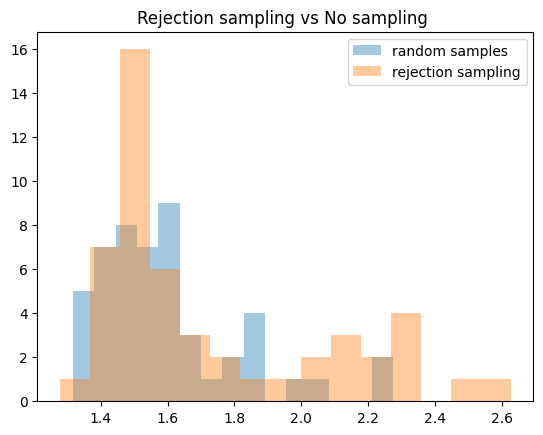

In [ ]:
import matplotlib.pyplot as plt
plt.title('Rejection sampling vs No sampling ')
plt.hist(random_samples, bins=15, label='random samples', alpha=0.4)
plt.hist(rs_samples, bins=15, label='rejection sampling', alpha=0.4)
plt.legend()

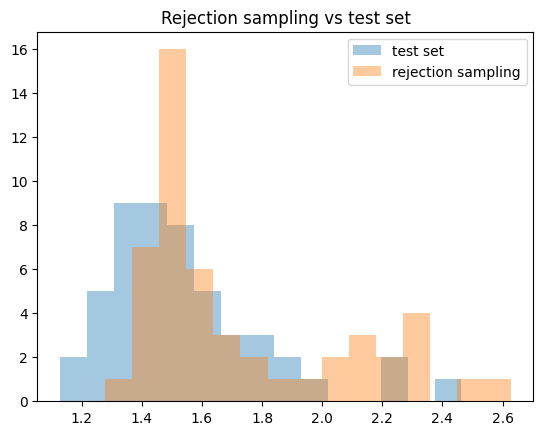

In [ ]:
plt.title('Rejection sampling vs test set')
plt.hist(np.exp(test['train']['fitness'][:iterations]), bins=15, alpha=0.4, label='test set')
plt.hist(rs_samples, bins=15, label='rejection sampling', alpha=0.4)
plt.legend()

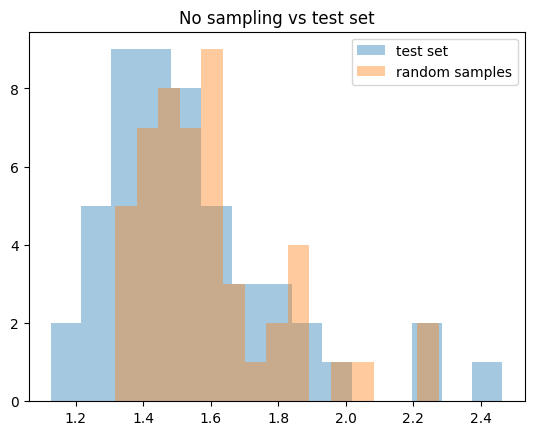

In [ ]:
plt.title('No sampling vs test set')
plt.hist(np.exp(test['train']['fitness'][:iterations]), bins=15, alpha=0.4, label='test set')
plt.hist(random_samples, bins=15, label='random samples', alpha=0.4)
plt.legend()

From the histogram above, we notice that when using our sequence generator without any refinement, it yields lower values of fitness compared to the ones generated with the help of rejection sampling. This is explained by the fact that our generator was not trained to generate the sequeneces that maximizes the fitness as our dataset contains a lot of low fitness sequences. Using rejection sampling allows us then to refine the predictions of the generator by introducing a bias to higher fitness sequences. One drawback however is that generating such sequences can be computationally expensive as we need to sample a binding multiple times for the same starting_seq in order to get the better ones.

### MCMC:

In [ ]:
# Metropolis-Hastings algorithm
def metropolis_hastings(iterations, target_dist, initial_state=0):
    samples = [initial_state]
    current_state = initial_state

    for i in tqdm(range(iterations)):
        # Generate a proposal for the next state
        #generate sequence from gpt. How to incorporate current_state ? we can just ignore if p(current_state | prev_state ) == p(prev_state | current_state) as seen in algo (see lecture notes)
        current_starting_seq = current_state[:8]
        current_binding = [current_state[8:]]
        current_state_fitness = predict_fitness(test_dataset, current_starting_seq, current_binding)

        proposal = generate_sequences(current_starting_seq, n_sequences=1)
        proposal_fitness = predict_fitness(test_dataset, current_starting_seq, proposal)
        # Calculate the acceptance probability
        #We calculate fitness of new generated sequence (\phi(proposal)) and fitness of current sequence (\phi(current_seq))
        acceptance_prob = min(1, torch.exp(proposal_fitness) / torch.exp(current_state_fitness))

        # Accept or reject the proposal
        if np.random.rand() < acceptance_prob:
            current_state = current_starting_seq + proposal[0]
            current_state_fitness = proposal_fitness
    
        samples.append(current_state_fitness)
    return samples

In [ ]:
# Parameters
iterations = 50

# Run the Metropolis-Hastings algorithm
#for item in tqdm(test['train']['start_bind'][:50]):
start_seq = item[:8]
initial_state = start_seq + generate_sequences(start_seq, n_sequences=1)[0]
mcmc_samples = metropolis_hastings(iterations, predict_fitness, initial_state)

100%|██████████| 50/50 [00:22<00:00,  2.26it/s]


In [ ]:
mcmc_samples = [val.item() for val in mcmc_samples[1:]]

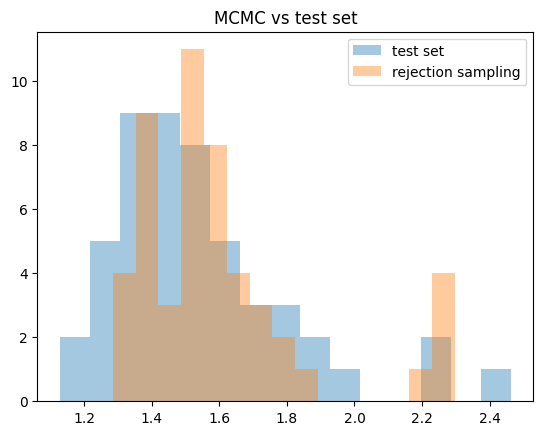

In [ ]:
plt.title('MCMC vs test set')
plt.hist(np.exp(test['train']['fitness'][:iterations]), bins=15, alpha=0.4, label='test set')
plt.hist(np.exp(mcmc_samples), bins=15, label='rejection sampling', alpha=0.4)
plt.legend()

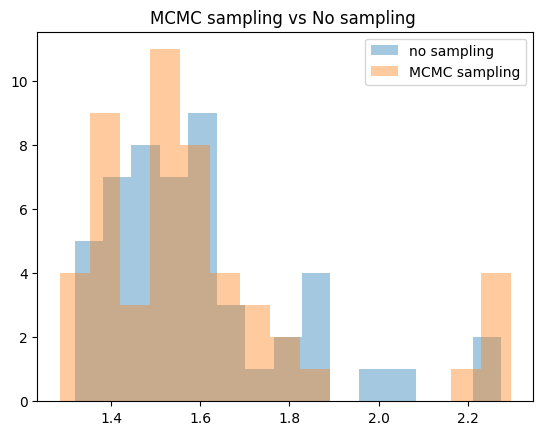

In [ ]:
plt.title('MCMC sampling vs No sampling ')
plt.hist(random_samples, bins=15, label='no sampling', alpha=0.4)
plt.hist(np.exp(mcmc_samples), bins=15, label='MCMC sampling', alpha=0.4)
plt.legend()